In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

In [3]:
tickers = [
    'AAPL',
    'MSFT',
    'AMZN',
    'GOOG',
    'TSLA',
]

In [4]:
df = yf.download(tickers=tickers, start='2022-12-12', end='2025-07-11')
df

/tmp/ipykernel_26111/2660695392.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=tickers, start='2022-12-12', end='2025-07-11')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        TSLA   
Date                                                                     
2022-12-12  142.642288   90.550003   93.007149  247.481461  167.820007   
2022-12-13  143.609741   92.489998   95.283623  251.803650  160.949997   
2022-12-14  141.378647   91.580002   94.746811  252.097672  156.800003   
2022-12-15  134.754440   88.449997   90.661095  244.051163  157.669998   
2022-12-16  132.789886   87.860001   90.323105  239.817154  150.229996   
...                ...         ...         ...         ...         ...   
2025-07-03  213.550003  223.410004  180.550003  498.839996  315.350006   
2025-07-07  209.949997  223.470001  177.559998  497.720001  293.940002   
2025-07-08  210.009995  219.360001  175.160004  496.619995  297.809998   
2025-07-09  211.139999  222.539993  177.660004  503.510010  295.880005   
2025-07-10  212.410004  222.259995  178.699997  501.480011  309.869995   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        MSFT        TSLA  ...   
Date                                                                    ...   
2022-12-12  142.652155   90.580002   93.320290  247.510862  177.369995  ...   
2022-12-13  148.052196   96.250000   99.210287  258.664250  175.050003  ...   
2022-12-14  144.784525   93.459999   96.645528  257.360727  161.619995  ...   
2022-12-15  139.986667   89.970001   93.474374  249.137810  160.929993  ...   
2022-12-16  135.889732   89.349998   91.207845  244.864589  160.990005  ...   
...                ...         ...         ...         ...         ...  ...   
2025-07-03  214.649994  224.009995  180.770004  500.130005  318.450012  ...   
2025-07-07  216.229996  224.289993  180.339996  498.750000  296.149994  ...   
2025-07-08  211.429993  224.000000  178.789993  498.200012  304.049988  ...   
2025-07-09  211.330002  224.289993  180.279999  506.779999  300.149994  ...   
2025-07-10  213.479996  222.789993  179.589996  504.440002  310.480011  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN        GOOG        MSFT        TSLA   
Date                                                                     
2022-12-12  140.875170   89.209999   92.539925  242.522229  176.100006   
2022-12-13  147.588205   95.230003   97.490506  256.478648  174.869995   
2022-12-14  143.491280   92.500000   94.975455  252.009467  159.250000   
2022-12-15  139.305488   89.889999   92.987272  248.667373  153.440002   
2022-12-16  134.942017   88.269997   90.661092  243.600285  159.639999   
...                ...         ...         ...         ...         ...   
2025-07-03  212.149994  221.820007  179.820007  493.809998  317.989990   
2025-07-07  212.679993  223.000000  180.134995  497.380005  291.369995   
2025-07-08  210.100006  223.919998  178.779999  497.239990  297.000000   
2025-07-09  209.529999  221.070007  176.110001  500.299988  297.549988   
2025-07-10  210.509995  221.550003  176.669998  503.049988  300.049988   

Price          Volume                                            
Ticker           AAPL       AMZN      GOOG      MSFT       TSLA  
Date                                                             
2022-12-12   70462700   61999800  27380900  30665100  109794500  
2022-12-13   93886200  100212000  34788500  42196900  175862700  
2022-12-14   82291200   70298000  26452900  35410900  140682300  
2022-12-15   98931900   84802900  28298800  35560400  122334500  
2022-12-16  160156900  146144100  48485500  86102000  139032200  
...               ...        ...       ...       ...        ...  
2025-07-03   34955800   29632400  13287400  13984800   58042300  
2025-07-07   50229000   36604100  20991400  13981600  131177900  
2025-07-08   42848900   45692000  24108600  11846600  103246700  
2025-07-09   48749400   381

<Axes: xlabel='Date'>

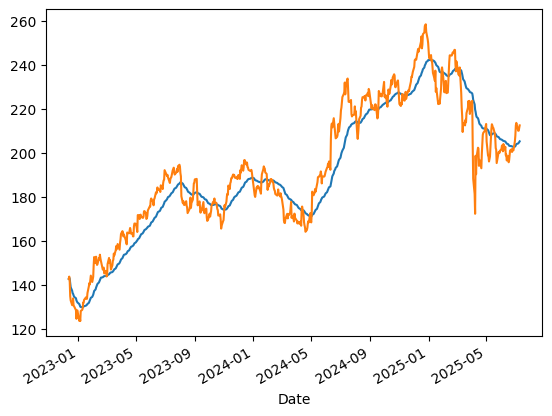

In [5]:
test = df["Close"]["AAPL"].ewm(20).mean()
test.plot()
df["Close"]["AAPL"].plot()

In [6]:
test

Date
2022-12-12    142.642288
2022-12-13    143.137813
2022-12-14    142.522593
2022-12-15    140.436202
2022-12-16    138.754196
                 ...    
2025-07-03    203.908892
2025-07-07    204.196563
2025-07-08    204.473393
2025-07-09    204.790851
2025-07-10    205.153668
Name: AAPL, Length: 645, dtype: float64

In [27]:
class Portifolio:

    def __init__(self, prices : pd.DataFrame):
        self.prices = prices
        self.t = 30  # Start after enough lookback
        self.end_t = prices.shape[0]
        self.portifolio = { ticker : 0 for ticker in prices.columns }
        self.record = { "portifolio" : [ self.portifolio.copy() ] }
        self.values = []
        self.cash = 100000      
        self.benchmark_model = None

    def strategy(self):
        pass

    def buy(self, ticker, order_size=1):
        if self.cash < order_size * self.prices[ticker].iloc[self.t]:
            return 
        self.portifolio[ticker] += order_size
        self.cash -= order_size * self.prices[ticker].iloc[self.t]

    def sell(self, ticker, order_size=1):
        if self.portifolio[ticker] < order_size:
            return
        self.portifolio[ticker] -= order_size
        self.cash += order_size * self.prices[ticker].iloc[self.t]

    def get_value(self):
        return self.cash + np.sum([
            self.portifolio[ticker] * self.prices[ticker].iloc[self.t]
            for ticker in self.portifolio.keys()
        ])

    def step(self):
        self.strategy()
        self.values.append(self.get_value())
        self.record["portifolio"].append(self.portifolio.copy())
        self.t += 1

    def run(self, benchmark_cls = None):
        if benchmark_cls:
            self.benchmark_model = benchmark_cls(self.prices)
            self.benchmark_model.run()            

        while self.t < self.end_t:
            self.step()

    def plot(self):
        plt.plot(self.values, label="My Portfolio") # Plot the portfolio's value

        if self.benchmark_model:
            plt.plot(self.benchmark_model.values, label="Benchmark Portfolio")

        plt.title("Portfolio Value Over Time")
        plt.xlabel("Time Step")
        plt.ylabel("Portfolio Value")
        plt.legend() # Show legend for portfolio and benchmark
        plt.grid(True)
        plt.show() # Display the plot

        plt.figure(figsize=(12, 6)) # Create a new figure for individual stock prices
        for ticker in self.prices.columns: # Iterate through all tickers
            plt.plot(self.prices[ticker], label=ticker) # Plot each ticker's price
        plt.title("Individual Stock Prices Over Time")
        plt.xlabel("Time Step")
        plt.ylabel("Price")
        plt.legend() # Show legend for individual stocks
        plt.grid(True)
        plt.show()

In [28]:
class NaivePortifolio(Portifolio):
    def strategy(self):
        for ticker in self.portifolio.keys():
            if self.prices[ticker].iloc[self.t] > self.prices[ticker].iloc[self.t - 1]:
                self.buy(ticker)
            elif self.prices[ticker].iloc[self.t] < self.prices[ticker].iloc[self.t - 1]:
                self.sell(ticker)

In [29]:
class BuyHoldPortifolio(Portifolio):
    def strategy(self):
        if self.cash == 0:
            return
        cash_per_ticker = self.cash / len(self.portifolio.keys())
        for ticker in self.portifolio.keys():
            order_size = cash_per_ticker / self.prices[ticker].iloc[self.t]
            self.buy(ticker, order_size)

In [30]:
class MarkovPortifolio(Portifolio):

    def __init__(self, prices : pd.DataFrame):
        super().__init__(prices)
        self.markov_transitions = { ticker: np.zeros((3,3)) for ticker in self.portifolio.keys() }
        self.threshold = 0.005
        self.state_to_idx = { "bullish" : 0, "neutral" : 1, "bearish" : 2 }
        self.curr_state  = { ticker : "neutral" for ticker in self.portifolio.keys() }

    def strategy(self):
        for ticker in self.portifolio.keys():
            past_return = np.log(self.prices[ticker].iloc[self.t] / self.prices[ticker].iloc[self.t - 1])

            if past_return > self.threshold:
                self.markov_transitions[ticker][self.state_to_idx[self.curr_state[ticker]]][self.state_to_idx["bullish"]] += 1
                self.curr_state[ticker] = "bullish"
                self.buy(ticker)
            elif past_return < -self.threshold:
                self.markov_transitions[ticker][self.state_to_idx[self.curr_state[ticker]]][self.state_to_idx["bearish"]] += 1
                self.curr_state[ticker] = "bearish"
                self.sell(ticker)
            else :
                self.markov_transitions[ticker][self.state_to_idx[self.curr_state[ticker]]][self.state_to_idx["neutral"]] += 1
                self.curr_state[ticker] = "neutral"


In [31]:
test.markov_transitions

{'AAPL': array([[88., 75., 66.],
        [70., 60., 63.],
        [72., 57., 64.]]),
 'AMZN': array([[97., 65., 90.],
        [58., 37., 51.],
        [97., 44., 76.]]),
 'GOOG': array([[114.,  63.,  89.],
        [ 68.,  32.,  44.],
        [ 85.,  48.,  72.]]),
 'MSFT': array([[73., 88., 68.],
        [85., 52., 66.],
        [71., 63., 49.]]),
 'TSLA': array([[117.,  37., 111.],
        [ 39.,  12.,  38.],
        [110.,  39., 112.]])}

In [34]:
test.record["portifolio"]

[{'AAPL': 0, 'AMZN': 0, 'GOOG': 0, 'MSFT': 0, 'TSLA': 0},
 {'AAPL': 1, 'AMZN': 1, 'GOOG': 1, 'MSFT': 1, 'TSLA': 1},
 {'AAPL': 2, 'AMZN': 2, 'GOOG': 2, 'MSFT': 1, 'TSLA': 2},
 {'AAPL': 1, 'AMZN': 1, 'GOOG': 1, 'MSFT': 0, 'TSLA': 1},
 {'AAPL': 2, 'AMZN': 2, 'GOOG': 2, 'MSFT': 1, 'TSLA': 2},
 {'AAPL': 3, 'AMZN': 3, 'GOOG': 3, 'MSFT': 2, 'TSLA': 3},
 {'AAPL': 4, 'AMZN': 4, 'GOOG': 4, 'MSFT': 3, 'TSLA': 4},
 {'AAPL': 5, 'AMZN': 3, 'GOOG': 3, 'MSFT': 2, 'TSLA': 5},
 {'AAPL': 4, 'AMZN': 2, 'GOOG': 2, 'MSFT': 1, 'TSLA': 6},
 {'AAPL': 5, 'AMZN': 2, 'GOOG': 3, 'MSFT': 2, 'TSLA': 7},
 {'AAPL': 4, 'AMZN': 1, 'GOOG': 2, 'MSFT': 2, 'TSLA': 8},
 {'AAPL': 3, 'AMZN': 0, 'GOOG': 1, 'MSFT': 1, 'TSLA': 9},
 {'AAPL': 3, 'AMZN': 0, 'GOOG': 0, 'MSFT': 1, 'TSLA': 8},
 {'AAPL': 4, 'AMZN': 1, 'GOOG': 0, 'MSFT': 2, 'TSLA': 7},
 {'AAPL': 4, 'AMZN': 1, 'GOOG': 0, 'MSFT': 2, 'TSLA': 8},
 {'AAPL': 5, 'AMZN': 2, 'GOOG': 1, 'MSFT': 1, 'TSLA': 9},
 {'AAPL': 4, 'AMZN': 1, 'GOOG': 0, 'MSFT': 0, 'TSLA': 8},
 {'AAPL': 3, '

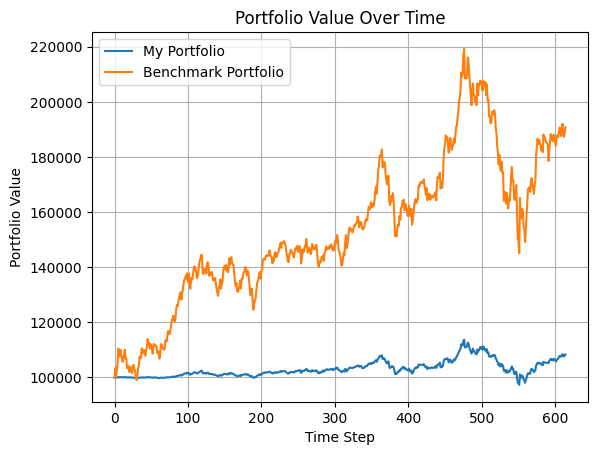

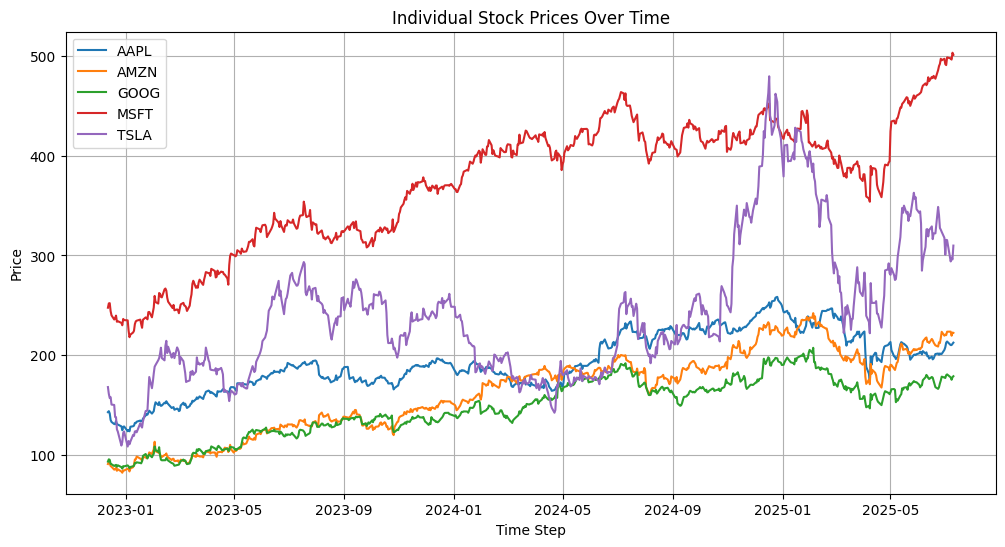

In [33]:
test = MarkovPortifolio(df["Close"])
test.run(BuyHoldPortifolio)
test.plot()

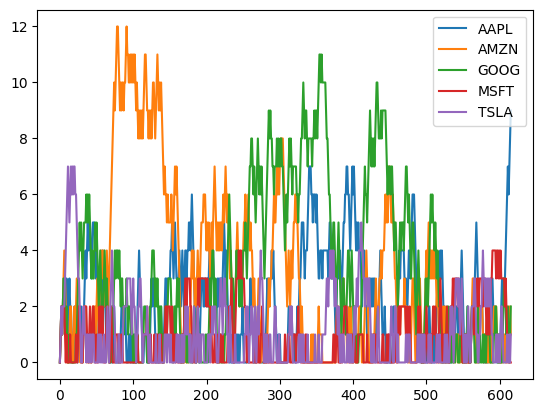

In [ ]:
for ticker in test.portifolio.keys():
    values = [record[ticker] for record in test.record["portifolio"]]
    plt.plot(values, label=ticker)
    plt.legend()
plt.show()